# Set Up

In [1]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Simple Linear Regression

In [25]:
# Generate 1D data

import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m,1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

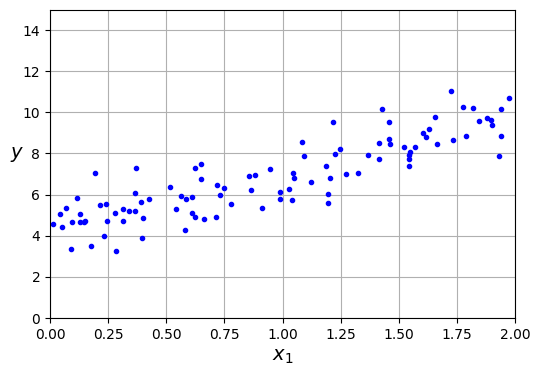

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

# Define a function for linear regression with gradient descent
In this cell we will define linear regression and gradient descent from scratch.

In [4]:
#Define the output as a linear combination of features
def Predict(X, weights, bias):
    return np.dot(X, weights) + bias

#Define the Linear Regression Function
def LinearRegressionGD(X, y, eta=0.1, num_epochs=50, random_state=1):
    rgen = np.random.RandomState(random_state)
    num_samples = X.shape[0]
    num_features = X.shape[1]

    #if X is 1D reshape it
    if num_features == 1:
        X.reshape((1,num_samples))

    #initialize random weights and bias
    weights = rgen.normal(loc=0.0, scale=0.01, size=num_features)
    bias = np.array([0.])

    #create an empty list to store loss values
    losses = []

    #Perform gradient descent
    for epoch in range(num_epochs):
        output = Predict(X, weights, bias)

        #Update weights
        for k in range(num_features):
            gradMSE = 0.0
            for i in range(num_samples):
                gradMSE += (output[i] - y[i])*X[i,k]
            gradMSE *= (2.0/num_samples)
            weights[k] -= eta*gradMSE

        #Update bias
        bias_gradMSE = 0.0
        for i in range(num_samples):
            bias_gradMSE += (output[i] - y[i])
        bias_gradMSE *= (2.0/num_samples)
        bias -= eta*bias_gradMSE

        #calculate and store the loss values at each epoch
        loss = np.mean((output - y)**2)
        losses.append(loss)

    return weights, bias, losses


<ipython-input-4-944a0838a383>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[k] -= eta*gradMSE


epoch:  0 loss:  49.800282147732204
epoch:  1 loss:  49.42757566136153
epoch:  2 loss:  49.058055262952585
epoch:  3 loss:  48.69169419636412
epoch:  4 loss:  48.32846592805311
epoch:  5 loss:  47.968344145231356
epoch:  6 loss:  47.61130275403741
epoch:  7 loss:  47.25731587772356
epoch:  8 loss:  46.90635785485776
epoch:  9 loss:  46.55840323754051
epoch:  10 loss:  46.21342678963637
epoch:  11 loss:  45.871403485020174
epoch:  12 loss:  45.53230850583767
epoch:  13 loss:  45.196117240780524
epoch:  14 loss:  44.862805283375664
epoch:  15 loss:  44.53234843028865
epoch:  16 loss:  44.204722679641165
epoch:  17 loss:  43.879904229342266
epoch:  18 loss:  43.55786947543366
epoch:  19 loss:  43.23859501044836
epoch:  20 loss:  42.92205762178311
epoch:  21 loss:  42.60823429008426
epoch:  22 loss:  42.297102187646814
epoch:  23 loss:  41.98863867682689
epoch:  24 loss:  41.68282130846717
epoch:  25 loss:  41.37962782033547
epoch:  26 loss:  41.079036135576104
epoch:  27 loss:  40.7810243

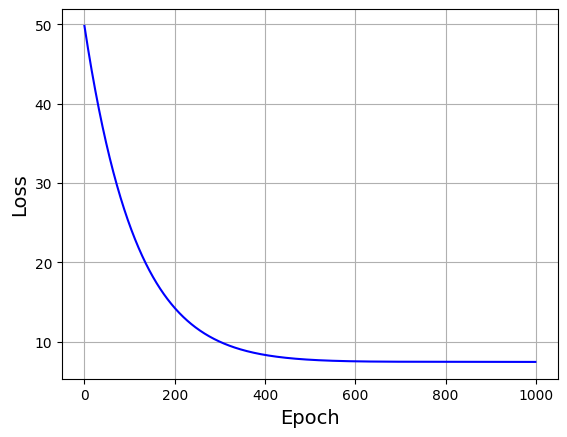

In [39]:
#Perform linear regression
weightsGD, biasGD, lossesGD = LinearRegressionGD(X, y, num_epochs=1000, eta=0.001)

#Print epoch vs loss
epochs = np.arange(len(lossesGD))
for i in range(len(epochs)):
    print("epoch: ",epochs[i],"loss: ",lossesGD[i])

#plot epoch vs loss
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(epochs, lossesGD, 'b-')
plt.grid()

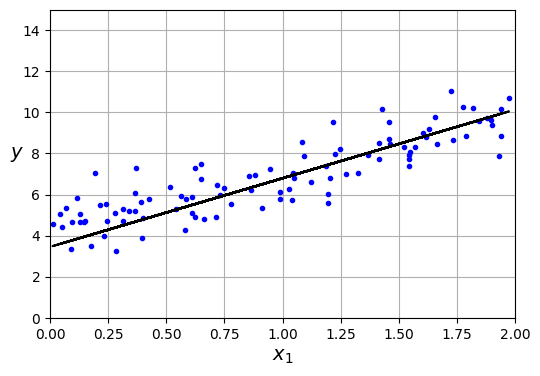

In [40]:
outputGD = Predict(X, weightsGD, biasGD)
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X, outputGD, 'k')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

# Stochastic Gradient Descent

In [41]:
#Function to randomly shuffle dataset
def RandShuffle(X,y):
    import random
    num_samples = X.shape[0]
    ind_list = list(range(num_samples))
    random.shuffle(ind_list)
    X  = X[ind_list, :]
    y = y[ind_list,]



#Define the Linear Regression Function
def LinearRegressionSGD(X, y, eta=0.1, num_epochs=50, random_state=1):
    rgen = np.random.RandomState(random_state)
    num_samples = X.shape[0]
    num_features = X.shape[1]

    #if X is 1D reshape it
    if num_features == 1:
        X.reshape((1,num_samples))

    #initialize random weights and bias
    weights = rgen.normal(loc=0.0, scale=0.01, size=num_features)
    bias = np.array([0.])

    #create an empty list to store loss values
    losses = []

    #Perform gradient descent
    for epoch in range(num_epochs):
        RandShuffle(X,y)
        output = Predict(X, weights, bias)

        #Update weights
        for k in range(num_features):
            for i in range(num_samples):
                gradMSE = 2.0 * (output[i] - y[i])*X[i,k] #update without summing or averaging
                weights[k] -= eta*gradMSE

        #Update bias
        for i in range(num_samples):
            bias_gradMSE = 2.0 * (output[i] - y[i]) #update without summing or averaging
            bias -= eta*bias_gradMSE

        #calculate and store the loss values at each epoch
        loss = np.mean((output - y)**2)
        losses.append(loss)

    return weights, bias, losses

(100, 1) (100, 1)


<ipython-input-41-ae8174f57c46>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[k] -= eta*gradMSE


epoch:  0 loss:  49.800282147732204
epoch:  1 loss:  20.746882944055454
epoch:  2 loss:  11.395413204315526
epoch:  3 loss:  8.542352827017941
epoch:  4 loss:  7.758833634085943
epoch:  5 loss:  7.5895733450469995
epoch:  6 loss:  7.574627597559342
epoch:  7 loss:  7.579841226131173
epoch:  8 loss:  7.5732384804157205
epoch:  9 loss:  7.55213812436348
epoch:  10 loss:  7.520483400037017
epoch:  11 loss:  7.4824649488713595
epoch:  12 loss:  7.441165283608014
epoch:  13 loss:  7.398585772062531
epoch:  14 loss:  7.35594587333767
epoch:  15 loss:  7.313956374838986
epoch:  16 loss:  7.273013348397615
epoch:  17 loss:  7.233323513611092
epoch:  18 loss:  7.194981741333849
epoch:  19 loss:  7.158017849289607
epoch:  20 loss:  7.122424474294571
epoch:  21 loss:  7.088173529747194
epoch:  22 loss:  7.055225859476284
epoch:  23 loss:  7.023536864617851
epoch:  24 loss:  6.993059757383187
epoch:  25 loss:  6.963747420653521
epoch:  26 loss:  6.9355534507068874
epoch:  27 loss:  6.9084327227579

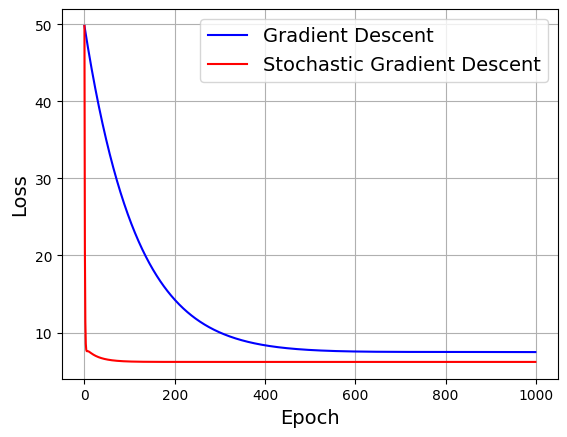

In [43]:
print(X.shape,y.shape)

#Perform linear regression with SGD
weightsSGD, biasSGD, lossesSGD = LinearRegressionSGD(X, y, num_epochs=1000, eta=0.001)

#Print epoch vs loss
epochs = np.arange(len(lossesSGD))
for i in range(len(epochs)):
    print("epoch: ",epochs[i],"loss: ",lossesSGD[i])

#plot epoch vs loss
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(epochs, lossesGD, 'b-',label = 'Gradient Descent')
plt.plot(epochs, lossesSGD, 'r-',label = 'Stochastic Gradient Descent')
plt.grid()
plt.legend()

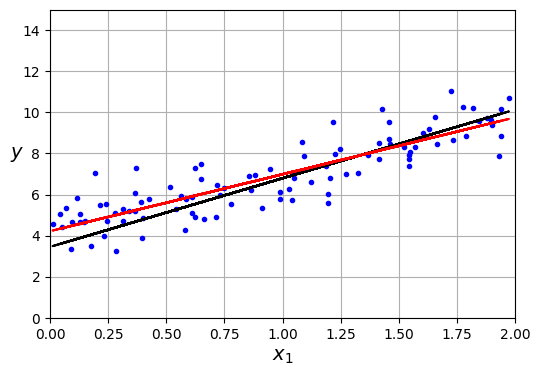

In [44]:
outputSGD = Predict(X, weightsSGD, biasSGD)
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X, outputGD, 'k')
plt.plot(X, outputSGD, 'r')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

# Role of Learning rate

<ipython-input-4-944a0838a383>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[k] -= eta*gradMSE


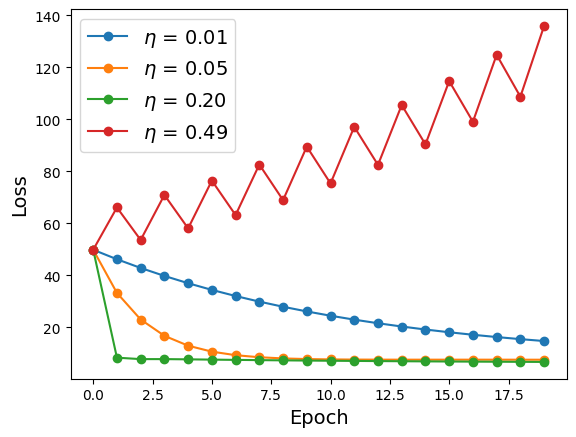

In [45]:
eta_list = [0.01, 0.05, 0.2, 0.49]  # learning rate
n_epochs = 20

plt.xlabel("Epoch")
plt.ylabel("Loss")

for eta in eta_list:
    weights, bias, losses = LinearRegressionGD(X, y, num_epochs=n_epochs, eta=eta)
    plt.plot(np.arange(n_epochs),losses,'-o',label='$\eta$ = %0.2f'%eta)
plt.legend(fontsize=14)

# Stochastic Gradient Descent Linear Regression with SkLearn

In [46]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, learning_rate='constant',verbose=5)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets



-- Epoch 1
Norm: 2.93, NNZs: 1, Bias: 3.090080, T: 100, Avg. loss: 6.458287
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.30, NNZs: 1, Bias: 3.618604, T: 200, Avg. loss: 0.551635
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 1, Bias: 3.682881, T: 300, Avg. loss: 0.454960
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 3.16, NNZs: 1, Bias: 3.794844, T: 400, Avg. loss: 0.444755
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 3.09, NNZs: 1, Bias: 3.852422, T: 500, Avg. loss: 0.435180
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 3.02, NNZs: 1, Bias: 3.895141, T: 600, Avg. loss: 0.428253
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 3.00, NNZs: 1, Bias: 3.964167, T: 700, Avg. loss: 0.423508
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.98, NNZs: 1, Bias: 4.019142, T: 800, Avg. loss: 0.416966
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 2.94, NNZs: 1, Bias: 4.051788, T: 900, Avg. loss: 0.416223
Total training time: 0.01 seconds.
-

SGDRegressor(learning_rate='constant', penalty=None, tol=1e-05, verbose=5)

In [47]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.17755081]), array([2.77902919]))

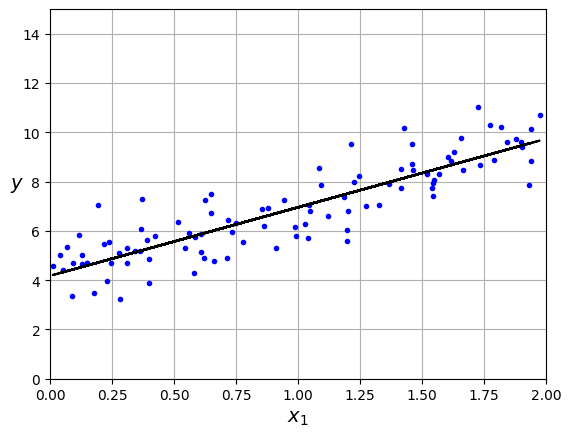

In [48]:
plt.plot(X, y, "b.")

y_predict = sgd_reg.predict(X)
plt.plot(X,y_predict,"k")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

# Polynomial Regression

Generate dataset

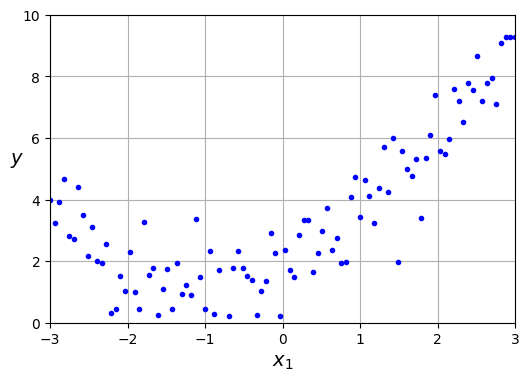

In [180]:
np.random.seed(42)
m = 100
X = np.linspace(-3,3,m)
y = 0.5 * X ** 2 + X + 2 + np.random.normal(size=m)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Create Polynomial Features

In [151]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))

print(X[0],X_poly[0])

-3.0 [-3.  9.]


epoch:  0 loss:  17.859623608283357
epoch:  1 loss:  10.162587425730651
epoch:  2 loss:  6.7161811500845
epoch:  3 loss:  5.0936831010667545
epoch:  4 loss:  4.262950566241873
epoch:  5 loss:  3.783906176314174
epoch:  6 loss:  3.4679610403711405
epoch:  7 loss:  3.2334628840667987
epoch:  8 loss:  3.0443301152558444
epoch:  9 loss:  2.8839885861339627
epoch:  10 loss:  2.7442916265816204
epoch:  11 loss:  2.620800558962119
epoch:  12 loss:  2.5107663639809585
epoch:  13 loss:  2.412259425271157
epoch:  14 loss:  2.323788092328848
epoch:  15 loss:  2.244126113143174
epoch:  16 loss:  2.1722299703339343
epoch:  17 loss:  2.1071954871896335
epoch:  18 loss:  2.0482320845526725
epoch:  19 loss:  1.9946453974800347
epoch:  20 loss:  1.9458242058366801
epoch:  21 loss:  1.9012298710200768
epoch:  22 loss:  1.8603874315136237
epoch:  23 loss:  1.8228779270650066
epoch:  24 loss:  1.788331706664616
epoch:  25 loss:  1.756422561554009
epoch:  26 loss:  1.726862567524343
epoch:  27 loss:  1.699

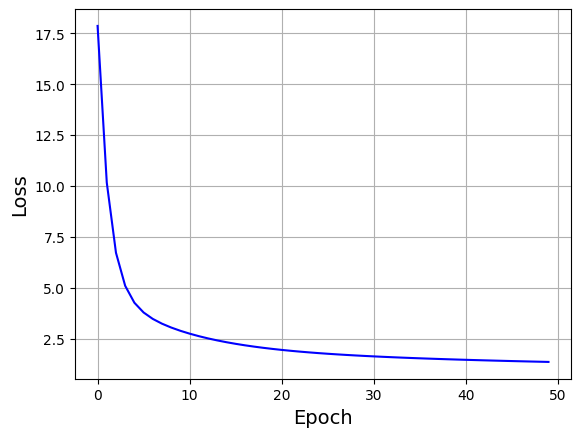

In [152]:
#Perform linear regression
n_epochs = 50
eta = 0.01

weights, bias, losses = LinearRegressionGD(X_poly, y, num_epochs=n_epochs, eta=eta)

#Print epoch vs loss
epochs = np.arange(n_epochs)
for i in range(len(epochs)):
    print("epoch: ",epochs[i],"loss: ",losses[i])

#plot epoch vs loss
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(epochs, losses, 'b')
plt.grid()

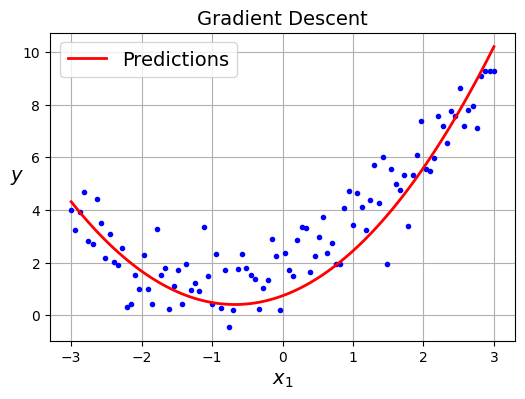

In [153]:
y_predicted = Predict(X_poly, weights, bias)


plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X, y_predicted, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
#plt.axis([-3, 3, 0, 10])
plt.grid()
plt.title('Gradient Descent')
plt.show()

-- Epoch 1
Norm: 1.21, NNZs: 2, Bias: 0.751358, T: 100, Avg. loss: 1.442620
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 2, Bias: 1.140316, T: 200, Avg. loss: 0.636902
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.24, NNZs: 2, Bias: 1.374971, T: 300, Avg. loss: 0.530681
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.18, NNZs: 2, Bias: 1.515173, T: 400, Avg. loss: 0.472339
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 2, Bias: 1.647342, T: 500, Avg. loss: 0.433877
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 2, Bias: 1.724605, T: 600, Avg. loss: 0.468452
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.15, NNZs: 2, Bias: 1.768937, T: 700, Avg. loss: 0.456942
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 1.21, NNZs: 2, Bias: 1.786098, T: 800, Avg. loss: 0.462592
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 1.13, NNZs: 2, Bias: 1.822842, T: 900, Avg. loss: 0.456154
Total training time: 0.02 seconds.
-

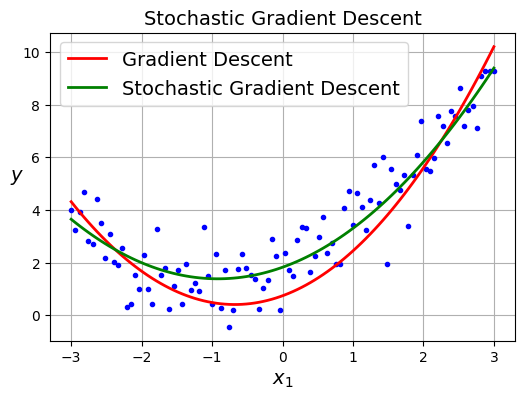

In [154]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, learning_rate='constant',verbose=5)
sgd_reg.fit(X_poly, y.ravel()) # y.ravel() because fit() expects 1D targets

y_predicted_sgd = sgd_reg.predict(X_poly)


plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X, y_predicted, "r-", linewidth=2, label="Gradient Descent")
plt.plot(X, y_predicted_sgd, "g-", linewidth=2, label="Stochastic Gradient Descent")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.title('Stochastic Gradient Descent')
plt.grid()
plt.show()

# Simplifying implementation with SKLearn Pipeline method

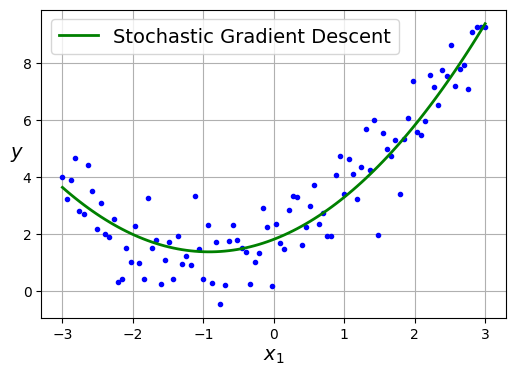

In [181]:
from sklearn.pipeline import Pipeline

#use pipeline to make model
model =  Pipeline([('poly',PolynomialFeatures(degree=2)),
                   ('normalize',StandardScaler()),
                   ('SGD',SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, learning_rate='constant'))])

model.fit(X_poly, y.ravel())

y_predicted = model.predict(X_poly)


plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X, y_predicted_sgd, "g-", linewidth=2, label="Stochastic Gradient Descent")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Overfitting and Regularization
Let's generate a noisy **Linear dataset** and try to fit it with polynomial function and then perform L2 and L1 resularization.

We will use RidgeRegression function from sklearn for initial unregulaized fitting for consistency.

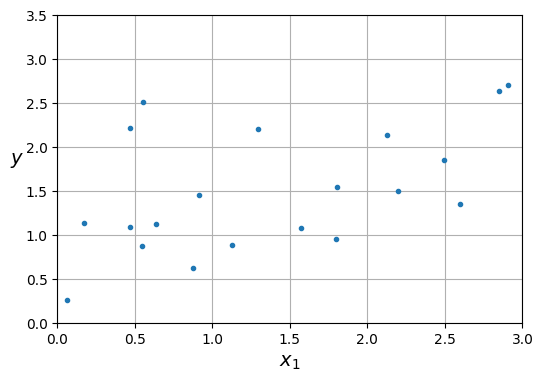

In [184]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5


plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

Fit without regularization ($\alpha$=0)

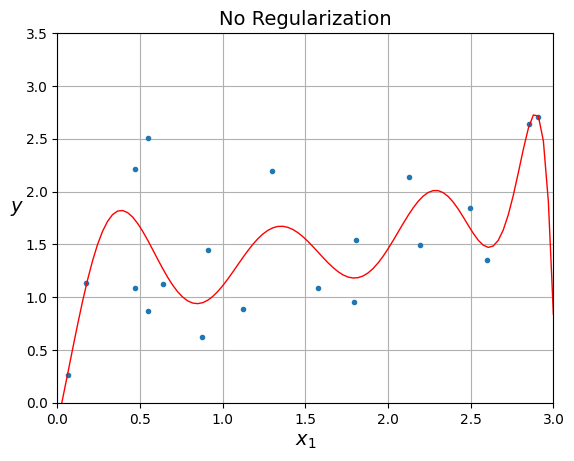

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#use pipeline to build model
model = Pipeline([('poly',PolynomialFeatures(degree=10, include_bias=False)),
                  ('normalize',StandardScaler()),
                  ('LinearRegression',LinearRegression())])

model.fit(X.reshape(-1,1), y.reshape(-1,1))

#test it on new data
X_new = np.linspace(0, 3, 100).reshape(100, 1)

y_new = model.predict(X_new)
plt.plot(X, y, ".")
plt.plot(X_new, y_new, linewidth=1, color='r')
plt.title('No Regularization')
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

# L2 Regularization (Ridge Regreesion)

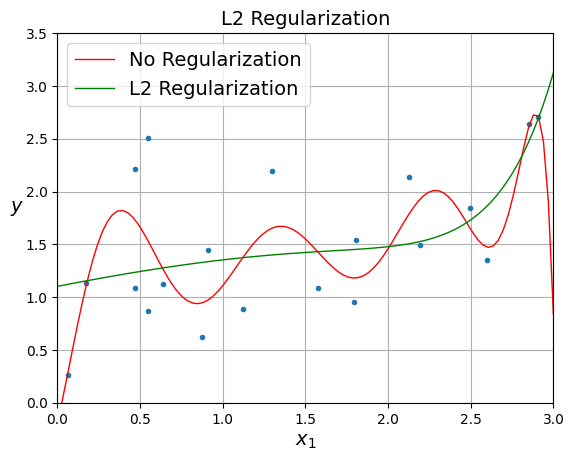

In [195]:
from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline

#use pipeline to build model
model_l2 = Pipeline([('poly',PolynomialFeatures(degree=10, include_bias=False)),
                  ('normalize',StandardScaler()),
                  ('RidgeRegression',Ridge(alpha=0.5))])

model_l2.fit(X.reshape(-1,1), y.reshape(-1,1))

#test it on new data
X_new = np.linspace(0, 3, 100).reshape(100, 1)

y_new_l2 = model_l2.predict(X_new)
plt.plot(X, y, ".")
plt.plot(X_new, y_new, linewidth=1, color='r',label='No Regularization')
plt.plot(X_new, y_new_l2, linewidth=1, color='g',label='L2 Regularization')
plt.title('L2 Regularization')
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.legend()
plt.show()

# L1 Regularization (Lasso Regreesion)

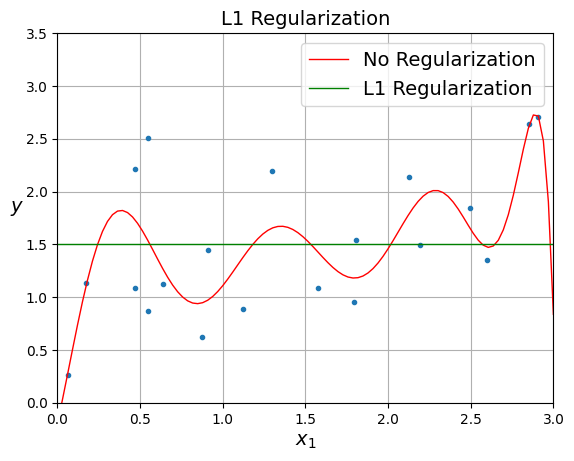

In [196]:
from sklearn.linear_model import Lasso

from sklearn.pipeline import Pipeline

#use pipeline to build model
model_l1 = Pipeline([('poly',PolynomialFeatures(degree=10, include_bias=False)),
                  ('normalize',StandardScaler()),
                  ('RidgeRegression',Lasso(alpha=0.5))])

model_l1.fit(X.reshape(-1,1), y.reshape(-1,1))

#test it on new data
X_new = np.linspace(0, 3, 100).reshape(100, 1)

y_new_l1 = model_l1.predict(X_new)
plt.plot(X, y, ".")
plt.plot(X_new, y_new, linewidth=1, color='r',label='No Regularization')
plt.plot(X_new, y_new_l1, linewidth=1, color='g',label='L1 Regularization')
plt.title('L1 Regularization')
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.legend()
plt.show()

# Test on Molecular Solvation Data

In [206]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dhimanray/Machine_Learning_for_Chemistry/main/datasets/solvation.csv')

df.head(10)

,Compound ID,predicted logS (mol/L),Minimum Degree,Molecular Weight,Num H-Bond Donors,Num Rings,Num Rotatable Bonds,Polar Surface Area,logS (mol/L),smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1
5,benzothiazole,-2.733,2,135.191,0,2,0,12.89,-1.50,c2ccc1scnc1c2
6,"2,2,4,6,6'-PCB",-6.545,1,326.437,0,2,1,0.00,-7.32,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl
7,Estradiol,-4.138,1,272.388,2,4,0,40.46,-5.03,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O
8,Dieldrin,-4.533,1,380.913,0,5,0,12.53,-6.29,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl
9,Rotenone,-5.246,1,394.423,0,5,3,63.22,-4.42,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C


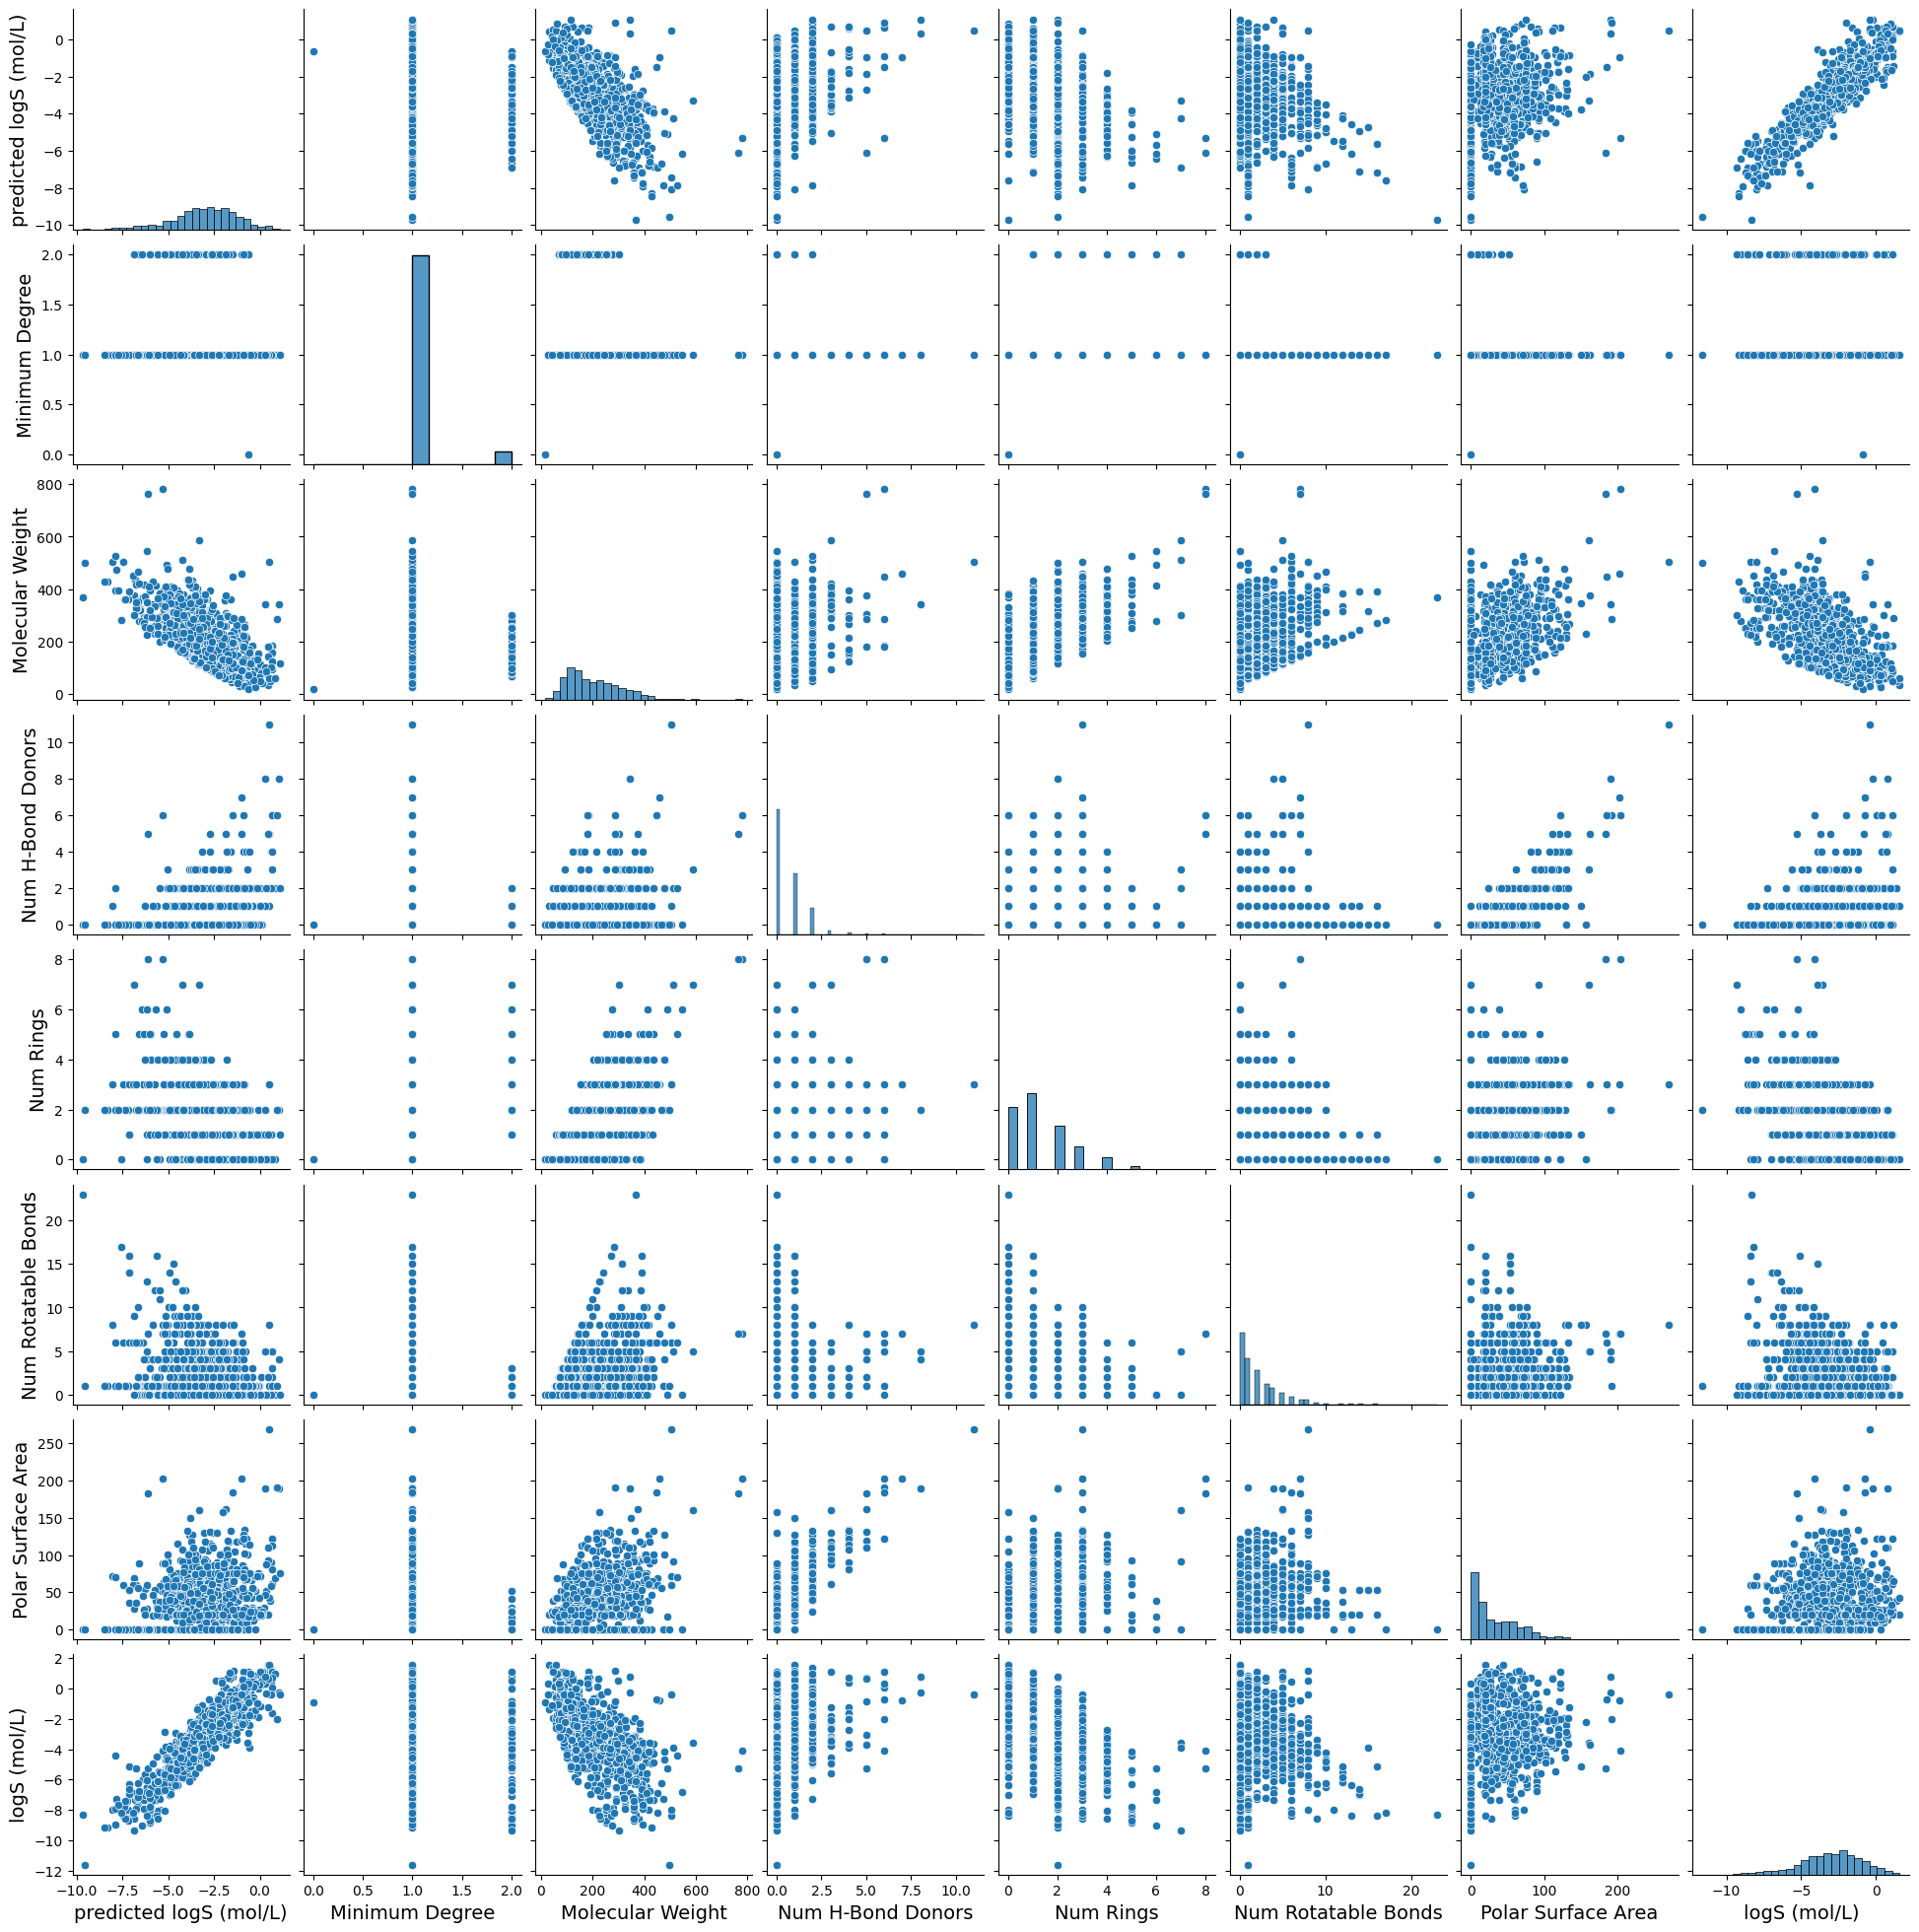

In [61]:
import seaborn as sns

data = df[['predicted logS (mol/L)','Minimum Degree','Molecular Weight','Num H-Bond Donors','Num Rings','Num Rotatable Bonds','Polar Surface Area','logS (mol/L)']]
sns.pairplot(data)

In [198]:
X = df[['Molecular Weight','Num H-Bond Donors','Num Rings','Num Rotatable Bonds','Polar Surface Area']].to_numpy()
y = df[['logS (mol/L)']].to_numpy()

Create pipeline for linear regression with stochastic gradient descent

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'weights = [-1.20378888  0.24151374 -0.43589681 -0.33801413  1.20512845] bias = [-2.83423388]')

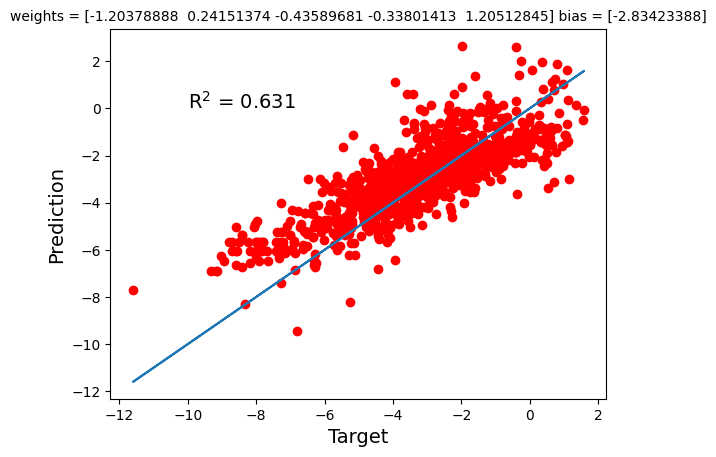

In [199]:
from sklearn.pipeline import Pipeline

#use pipeline to make model
model =  Pipeline([('normalize',StandardScaler()),('SGD',SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, learning_rate='constant'))])
model.fit(X,y)

#plot output
y_predict = model.predict(X)

plt.scatter(y,y_predict,color='r')
plt.plot(y,y)

#calculate r2 score
r2 = r2_score(y,y_predict)
plt.text(-10,0,'R$^2$ = %0.3f'%r2)


plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('weights = '+str(model['SGD'].coef_)+' bias = '+str(model['SGD'].intercept_),fontsize=10)


**Polynomial regression**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Prediction')

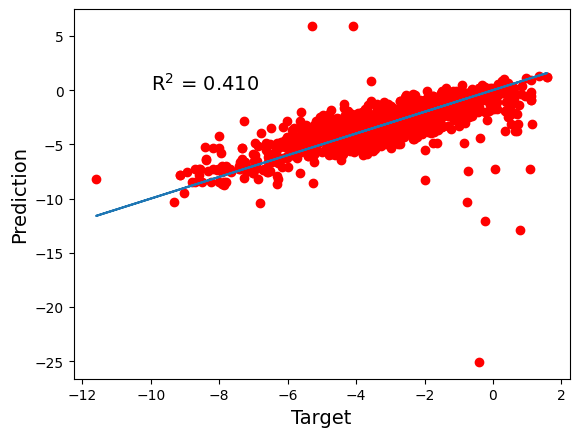

In [203]:
#use pipeline to make model
model =  Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),
                    ('normalize',StandardScaler()),
                    ('SGD',SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, learning_rate='constant'))])
model.fit(X,y)

#plot output
y_predict = model.predict(X)

plt.scatter(y,y_predict,color='r')
plt.plot(y,y)

#calculate r2 score
r2 = r2_score(y,y_predict)
plt.text(-10,0,'R$^2$ = %0.3f'%r2)


plt.xlabel('Target')
plt.ylabel('Prediction')

# Learning rate scheduling
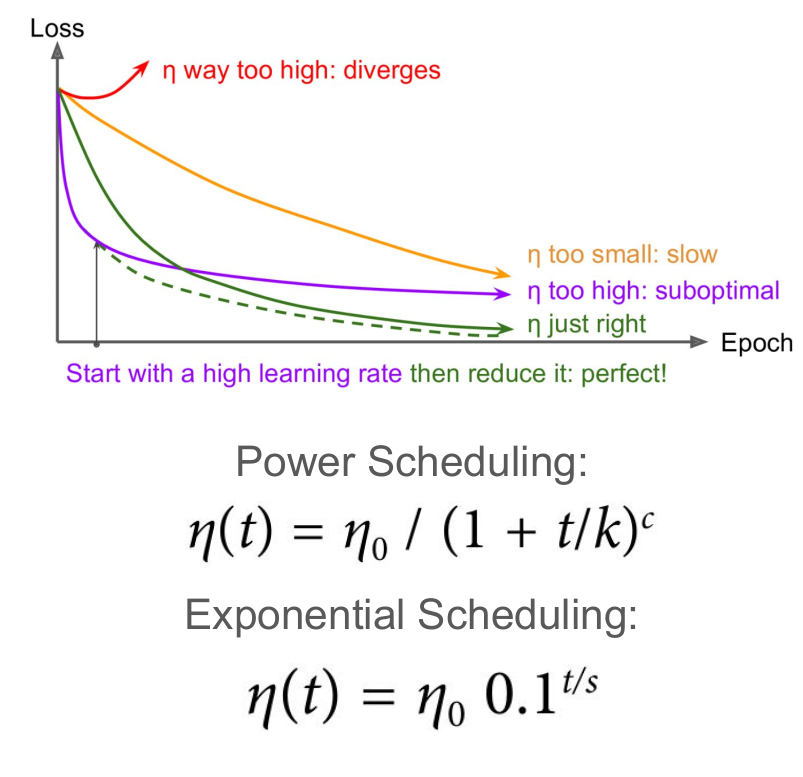

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Prediction')

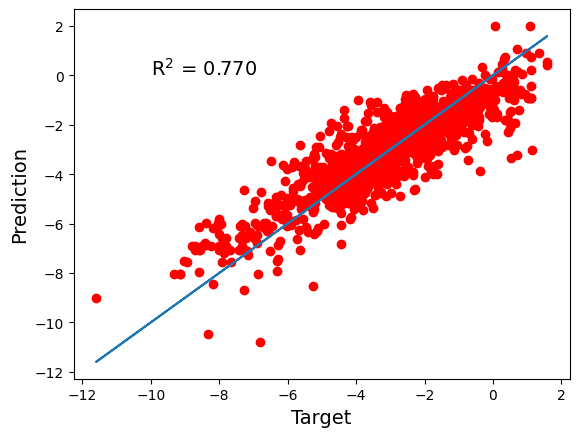

In [202]:
#exponential scheduling after starting with higher learning rate
model =  Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),
                    ('normalize',StandardScaler()),
                    ('SGD',SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, learning_rate='invscaling'))])
model.fit(X,y)

#plot output
y_predict = model.predict(X)

plt.scatter(y,y_predict,color='r')
plt.plot(y,y)

#calculate r2 score
r2 = r2_score(y,y_predict)
plt.text(-10,0,'R$^2$ = %0.3f'%r2)


plt.xlabel('Target')
plt.ylabel('Prediction')